# Tensorflow Basic Regression: Predict Fuel Efficiency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [4]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [13]:
dataset[['Cylinders', 'Model Year', 'Origin']].value_counts()

Cylinders  Model Year  Origin
8          73          1         20
           70          1         18
4          82          1         16
8          72          1         13
6          75          1         12
                                 ..
           77          3          1
           80          1          1
                       3          1
           81          2          1
3          72          3          1
Length: 76, dtype: int64

In [14]:
dataset['Origin'].unique()

array([1, 3, 2])

In [15]:
dataset = pd.get_dummies(dataset, columns=['Origin'], drop_first=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0


In [16]:
dataset[['Origin_2', 'Origin_3']].value_counts()

Origin_2  Origin_3
0         0           245
          1            79
1         0            68
dtype: int64

In [17]:
dataset['Origin_2'].value_counts()

0    324
1     68
Name: Origin_2, dtype: int64

In [18]:
dataset['Origin_3'].value_counts()

0    313
1     79
Name: Origin_3, dtype: int64

In [19]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [20]:
print(train_dataset.shape)
print(test_dataset.shape)

(314, 9)
(78, 9)


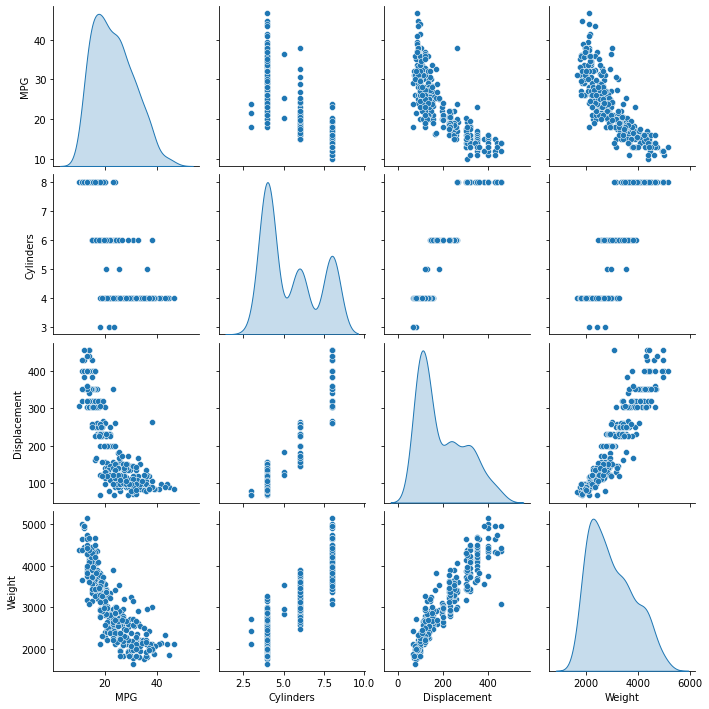

In [21]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [22]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin_2,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Origin_3,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [23]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [24]:
normalizer = preprocessing.Normalization()
normalizer.adapt(train_features.values)

In [25]:
normalizer.mean.numpy()

array([   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
          0.178,    0.197], dtype=float32)

## Linear Regression

In [27]:
horsepower = train_features['Horsepower'].values

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower)

In [30]:
horsepower_model = tf.keras.models.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [31]:
horsepower_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [33]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.1
)

Epoch 1/100
9/9 [==============================] - 1s 57ms/step - loss: 23.0033 - val_loss: 22.1558
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 22.3297 - val_loss: 21.2955
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 20.6917 - val_loss: 20.4065
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 20.3304 - val_loss: 19.5359
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 19.5707 - val_loss: 18.6799
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 18.1428 - val_loss: 17.8018
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 17.6162 - val_loss: 16.9360
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 16.2750 - val_loss: 16.0426
Epoch 9/100
9/9 [==============================] - 0s 10ms/step - loss: 16.6499 - val_loss: 15.1892
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 15.0685 - val_loss: 14.3127

In [36]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.809151,4.499080,95
96,3.808344,4.498829,96
97,3.806515,4.482840,97
98,3.807549,4.479740,98
99,3.807597,4.487041,99


In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

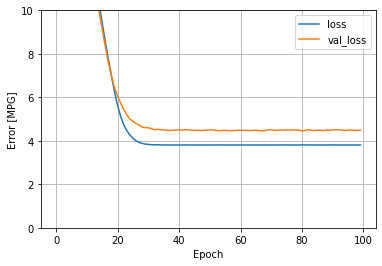

In [38]:
plot_loss(history)

In [42]:
test_results = dict()
test_results['horsepower_model'] = horsepower_model.evaluate(test_features['Horsepower'].values, test_labels, verbose=1)
test_results['horsepower_model']

3/3 [==============================] - 0s 3ms/step - loss: 3.6436


3.643554210662842

In [43]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [44]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

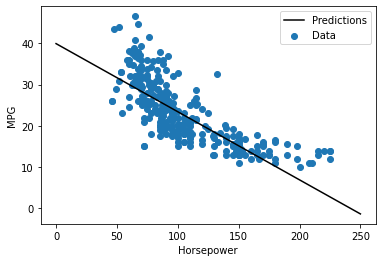

In [45]:
plot_horsepower(x, y)

In [46]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [47]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [48]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 8.63 s, sys: 202 ms, total: 8.83 s
Wall time: 8.53 s


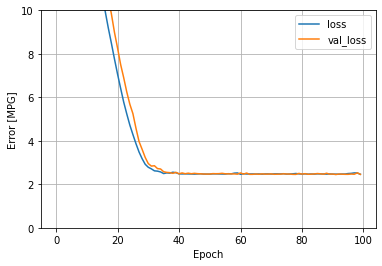

In [49]:
plot_loss(history)

In [50]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

## Deep Neural Network

In [53]:
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [54]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [55]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [56]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 8.78 s, sys: 204 ms, total: 8.99 s
Wall time: 8.57 s


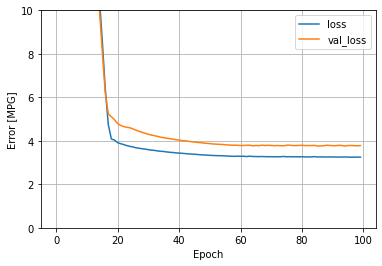

In [57]:
plot_loss(history)

In [58]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

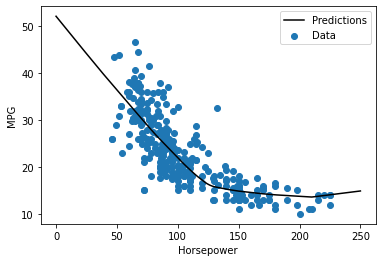

In [59]:
plot_horsepower(x, y)

In [60]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,
    verbose=0)

## Full Model

In [61]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [62]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 9 s, sys: 227 ms, total: 9.23 s
Wall time: 8.79 s


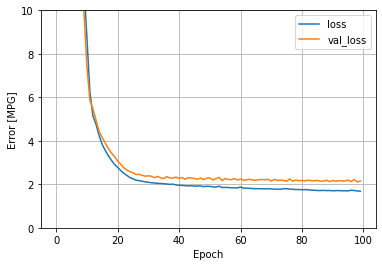

In [63]:
plot_loss(history)

In [64]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [65]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.643554
linear_model,2.453471
dnn_horsepower_model,2.902786
dnn_model,1.732927


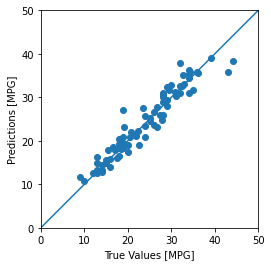

In [66]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

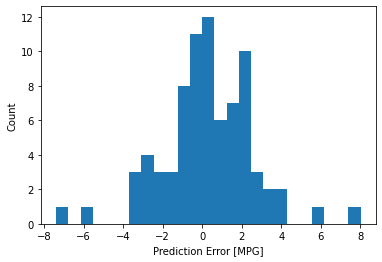

In [67]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [68]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [69]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [70]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.643554
linear_model,2.453471
dnn_horsepower_model,2.902786
dnn_model,1.732927
reloaded,1.732927
